In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#Summarize the following:
# Total number of customers targeted by the marketing campaign
# Average age of customers targeted by the marketing campaign
# Success rate of the marketing campaign: You can use the pivot_table
# function to group the data by the 'response' column and then calculate
# the mean of the 'response' column for each group. This will give you
# the success rate of the marketing campaign
# (i.e., the percentage of customers who responded to the campaign).


In [103]:
campaign = pd.read_csv('marketing_campaign.csv', sep=';', parse_dates=['Dt_Customer'])


In [104]:
campaign.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [105]:
pivot_unique_id = pd.pivot_table(campaign, index='Year_Birth', values='ID', aggfunc=pd.Series.nunique)


In [106]:
pivot_unique_id.columns = ['Total number of customers targeted by the marketing campaign per Birth Year']


In [107]:
pivot_unique_id


,Total number of customers targeted by the marketing campaign per Birth Year
Year_Birth,
1893,1
1899,1
1900,1
1940,1
1941,1
1943,7
1944,7
1945,8
1946,16


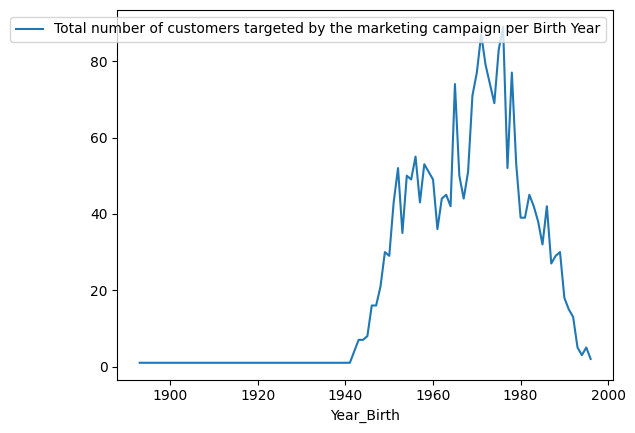

In [108]:
pivot_unique_id.plot()
plt.show()


In [109]:
pivot_age = pd.pivot_table(campaign, index='Marital_Status', values='Year_Birth', aggfunc='mean')


In [110]:
pivot_age['Average_Age'] = 2023 - pivot_age.Year_Birth


In [111]:
pivot_age


,Year_Birth,Average_Age
Marital_Status,,
Absurd,1975.000000,48.000000
Alone,1973.000000,50.000000
Divorced,1966.275862,56.724138
Married,1969.579861,53.420139
Single,1971.489583,51.510417
Together,1967.746552,55.253448
Widow,1958.558442,64.441558
YOLO,1973.000000,50.000000


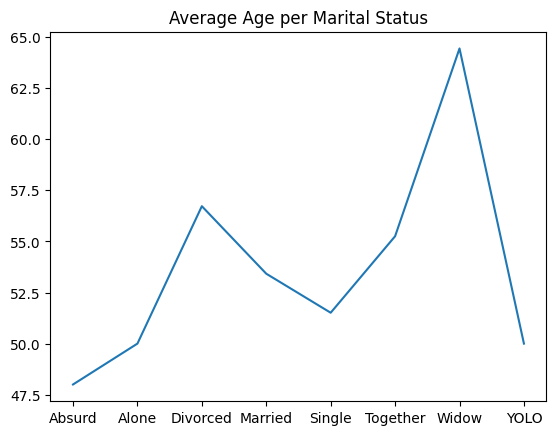

In [112]:
plt.plot(pivot_age.Average_Age)
plt.title('Average Age per Marital Status')
plt.show()


In [113]:
# How have purchases in store evolved over time?


In [115]:
campaign['quarter'] = campaign['Dt_Customer'].dt.to_period('Q')


In [116]:
campaign.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,quarter
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,2012Q3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,2014Q1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,2013Q3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,2014Q1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,2014Q1


In [117]:
# What are the overall quarterly sales trends?


In [146]:
purchases_pivot = campaign.pivot_table(values=['NumWebVisitsMonth', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumStorePurchases'], columns='quarter', aggfunc='sum')


In [147]:
purchases_pivot


quarter,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2
NumCatalogPurchases,728,758,864,842,675,825,641,630
NumDealsPurchases,675,775,860,649,619,585,526,519
NumStorePurchases,1401,1648,1914,1657,1662,1759,1492,1437
NumWebPurchases,1079,1255,1489,1160,1116,1172,925,954
NumWebVisitsMonth,1392,1723,1810,1470,1568,1424,1295,1227


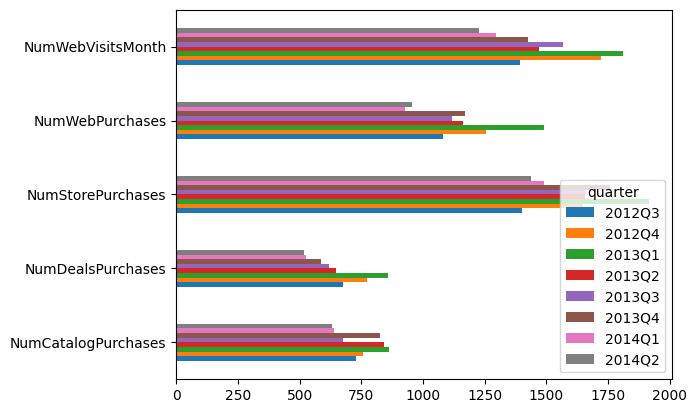

In [148]:
purchases_pivot.plot(kind='barh')
plt.show()

In [158]:
campaign_success_pivot = campaign.pivot_table(values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], columns='quarter', aggfunc='sum')


In [159]:
campaign_success_pivot


quarter,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2
AcceptedCmp1,10,14,23,17,17,21,18,24
AcceptedCmp2,3,4,3,6,4,2,4,4
AcceptedCmp3,18,19,26,10,21,23,24,22
AcceptedCmp4,14,30,21,21,23,14,25,19
AcceptedCmp5,15,17,23,25,19,19,27,18
Complain,2,4,5,1,5,1,3,0
Response,69,63,55,43,29,27,29,19
Z_CostContact,657,825,927,852,891,897,831,840
Z_Revenue,2409,3025,3399,3124,3267,3289,3047,3080


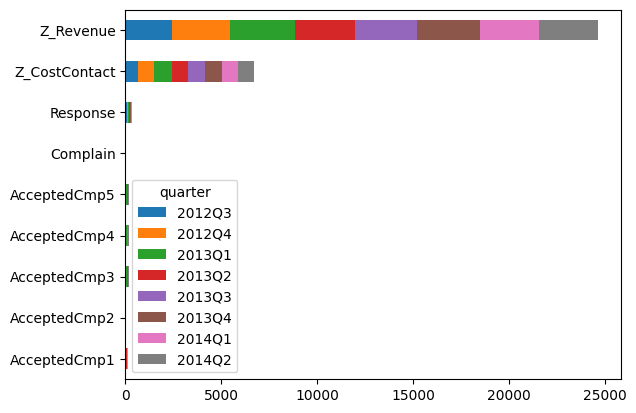

In [160]:
campaign_success_pivot.plot.barh(stacked=True)
plt.show()
